In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor                        
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score
from src.model_helper import *

%matplotlib inline
plt.style.use('ggplot')

### load and split data

In [42]:
path1 = 'data/processed_data.csv'

In [43]:
X_train, X_test, y_train, y_test = load_and_split_data(path1)

In [44]:
print(f'X_train shape:  {X_train.shape}')
print(f'y_train length: {len(y_train)}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train + y_test length: {len(y_train)+len(y_test)}')
# print((len(y_train)+len(y_test))==df.shape[0])

X_train shape:  (36471, 232)
y_train length: 36471
X_test shape:  (12158, 232)
y_train + y_test length: 48629


#### Basic Linear Regression

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [46]:
print(f'mse for LinearRegression: {mean_squared_error(y_test,lr_pred)}')
print(f'R2 for LinearRegression: {lr.score(X_train, y_train)}')

mse for LinearRegression: 1.034589864615923e+16
R2 for LinearRegression: 0.3676644365548639


#### Lasso Linear Regression

In [47]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [48]:
print(f'mse for Lasso: {mean_squared_error(y_test,lasso_pred)}')
print(f'R2 for Lasso: {lasso.score(X_train, y_train)}')

mse for Lasso: 8805.276746083582
R2 for Lasso: 0.35725863517659084


In [49]:
# Take a  look at the estimates
X_ = sm.add_constant(X_train)
mod = sm.OLS(y_train, X_)
results = mod.fit()
results.summary()

/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     93.66
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:00:34   Log-Likelihood:            -2.1681e+05
No. Observations:               36471   AIC:                         4.341e+05
Df Residuals:                   36245   BIC:                         4.360e+05
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            120.5094     17.940      6.717      0.000      85.346     155.673
minimum_nights                    -1.8822      0.064    -29.284      0.000      -2.008      -1.756
number_of_reviews                 -0.1585      0.014    -11.431      0.000      -0.186      -0.131
reviews_per_month                 -2.7513      0.397     -6.933      0.000      -3.529      -1.973
calculated_host_listings_count     0.0422      0.018      2.349      0.019       0.007       0.077
availability_365                   0.1564      0.004     37.843      0.000       0.148       0.165
name_length                        0.4397      0.049      9.023      0.000       0.344       0.535
room_type_Private room           -92.6379      1.044    -88.723      0.000     -94.684     -90.591
room_type_Shared room           -117.1468      3.249    -36.054      0.000    -123.515    -110.778
nb_g_Brooklyn                     26.8510     17.640      1.522      0.128      -7.724      61.426
nb_g_Manhattan                    83.1730     17.388      4.783      0.000      49.091     117.255
nb_g_Queens                       15.9681     17.879      0.893      0.372     -19.075      51.011
nb_g_Staten Island                -8.8808     19.248     -0.461      0.645     -46.608      28.846
nb_Arden Heights                 -33.4887     45.955     -0.729      0.466    -123.562      56.585
nb_Arrochar                      -14.7453     25.531     -0.578      0.564     -64.787      35.296
nb_Arverne                        19.1333     12.810      1.494      0.135      -5.974      44.241
nb_Astoria                         1.6946      5.085      0.333      0.739      -8.273      11.662
nb_Bath Beach                    -43.7253     25.289     -1.729      0.084     -93.293       5.843
nb_Battery Park City              18.3482     12.836      1.429      0.153      -6.810      43.506
nb_Bay Ridge                     -12.6555      9.247     -1.369      0.171     -30.779       5.468
nb_Bay Terrace                    34.7529     45.582      0.762      0.446     -54.590     124.095
nb_Bay Terrace, Staten Island     24.1561     90.796      0.266      0.790    -153.807     202.119
nb_Baychester                      7.1249     67.901      0.105      0.916    -125.963     140.212
nb_Bayside                        -3.9699     17.008     -0.233      0.815     -37.307      29.367
nb_Bayswater                     -15.2056     26.494     -0.574      0.566     -67.134      36.723
nb_Bedford-Stuyvesant             -7.1950      3.058     -2.353      0.019     -13.188      -1.202
nb_Belle Harbor                   34.5067     40.803      0.846      0.398     -45.468     114.481
nb_Bellerose                     -19.2552     27.655     -0.696      0.486     -73.459      34.948
nb_Belmont    

In [76]:
N_ESTIMATORS=100
gdbr = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, 
                                  learning_rate=0.01,random_state=1)
gdbr.fit(X_train, y_train)
gdbr_pred = gdbr.predict(X_test)

In [77]:
rf = RandomForestRegressor(n_estimators=N_ESTIMATORS, n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [78]:
print(f'rmse for gdbr: {mean_squared_error(y_test,gdbr_pred)**0.5}')
print(f'R2 for gdbr: {gdbr.score(X_train, y_train)}')
print(f'rmse for rf: {mean_squared_error(y_test,rf_pred)**0.5}')
print(f'R2 for rf: {rf.score(X_train, y_train)}')

rmse for gdbr: 101.07653644560764
R2 for gdbr: 0.2544562018619193
rmse for rf: 90.191083770387
R2 for rf: 0.9030705990178216


In [53]:
#### Bagging MSE vs. Num Estimators

In [68]:
num_estimator_list = [1,10,20,40,100,300,500,1000]
# num_estimator_list = [100,300]
train_errors_rf,test_errors_rf =rf_estimators_scores(num_estimator_list,X_train, y_train, X_test, y_test)

[1293.2677801460916, 1266.025766844195]

In [59]:
# train_errors_rf = []
# test_errors_rf = []

# for num_est in num_estimator_list:
#     rf = RandomForestRegressor(n_estimators = num_est, n_jobs=-1)
#     rf.fit(X_train, y_train)
#     y_pred_test =  rf.predict(X_test)
#     y_pred_train =  rf.predict(X_train)
    
#     train_errors_rf.append(mean_squared_error(y_pred_train, y_train)) 
#     test_errors_rf.append(mean_squared_error(y_pred_test, y_test))

In [69]:
print(train_errors_rf)
print(test_errors_rf)

[5565.618349477301, 1680.0645209402303, 1483.6006624177876, 1373.9685300998801, 1297.961620824038, 1275.44266352888, 1259.627792687823, 1261.5227722819948]
[15421.77335505648, 8845.610925173396, 8387.778816055086, 8195.862103262107, 8173.886566226824, 8057.847388400706, 8034.388993796186, 8039.656508451939]


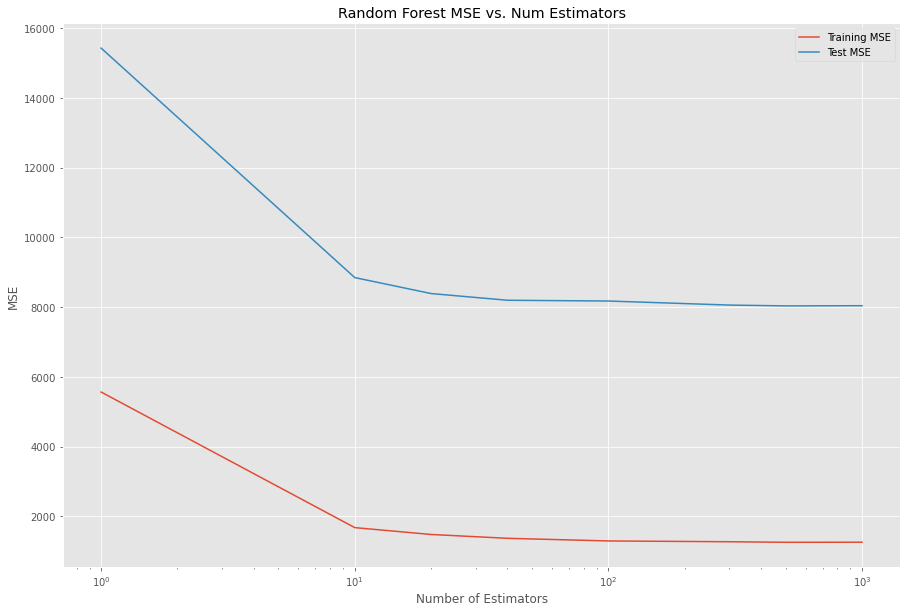

In [74]:
plt.figure(figsize=(15,10))
plt.plot(num_estimator_list, train_errors_rf, label='Training MSE')
plt.plot(num_estimator_list, test_errors_rf, label='Test MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.xscale('log')
plt.title('Random Forest MSE vs. Num Estimators')
plt.legend()
plt.savefig('images/rf_MSE_vs_num_estimators.png')


13. Feature ranking:
1. room_type_Private room (0.198365)
2. availability_365 (0.124564)
3. name_length (0.120793)
4. reviews_per_month (0.091298)
5. minimum_nights (0.081809)
6. number_of_reviews (0.074720)
7. calculated_host_listings_count (0.051248)
8. nb_g_Manhattan (0.045332)
9. room_type_Shared room (0.026227)
10. nb_g_Brooklyn (0.002616)


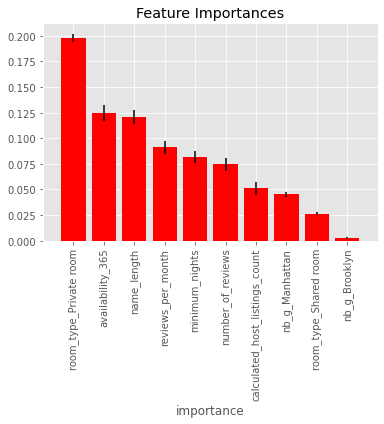

In [75]:
n = 10 # top 10 features

importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(X_train.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()

ax.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("importance")
ax.set_title("Feature Importances")
plt.savefig('images/top_10_feature_importances.png')

